<a href="https://colab.research.google.com/github/younesAmin/covid19-severity-prediction/blob/master/Covid_19_predection_Morocco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://www.inpt.ac.ma/sites/default/files/logo.png)



<div >
    <div style = "background-color: #50a6e1; padding:25px;">  
    <h1 ><center>Pattern	recognition	&	Machine	Learning</center></h1>
    <h2><center>Exercice: Web Scraping with Requests and Beautiful Soup</center></h2>
    <h2><center>SUD Cloud & IoT</center></h2>
    <blockquote><h1>LOUTFI YOUNES AMINE</h1></blockquote>
    <h3>Encadre par:</h3>
    <blockquote><h1>Mme.El asri Ikram</h1></blockquote>
    </div>
</div>



<div style = "background-color: #a8bfd0; padding:25px;">
<div id="content"><h3>Content table:</h3></div>

<h1><a href="#one">1. Exploring data </a></h1>
    
><h3><a href="#one1">   1.1 Importing libraries & data </a></h3>
><h3><a href="#one2">   1.2 Visualize data </a></h3>
><h3><a href="#one3">   1.3 Graphs data </a></h3>


<h1><a href="#two">2. Predecting data </a></h1>
    
><h3><a href="#two1">   2.1  Predecting the trend of confirmed cases in the next 10 Days </a></h3>
><h3><a href="#two2">   2.2  Predicting the new daily cases </a></h3>
><h3><a href="#two3">   2.3  Predicting the total deaths </a></h3>

<h1><a href="#clc">3. Conclusion  </a></h1>
</div>




<div id="one"><h1>1  Exploring data</h1></div>
<h4><a href="#content">reture to content table </a></h4>

<div id="one1"><h2>1.1  Importing libraries & data</h2></div>
<h4><a href="#content">reture to content table </a></h4>

<b>imort libraries<b>

In [48]:
 %matplotlib inline 
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

<b>import machine learning packages</b>

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error


<b>Import the data</b>

In [50]:
df = pd.read_csv('/content/datasets_566027_1266186_corona_morocco.csv')

<div id="one2"><h2>1.2  Visualize data</h2></div>
<h4><a href="#content">reture to content table </a></h4>

<b>Show the first 5 rows</b>

In [51]:
df.head()

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,02/03/2020,1.0,NaN,NaN,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,03/03/2020,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,04/03/2020,2.0,NaN,NaN,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/03/2020,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/03/2020,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Showing the number of rows and columns</b>

In [52]:
print("shape:",df.shape)

shape: (111, 17)


<b>Showing the size of our dataset</b>

In [53]:
print("Size:",df.size)

Size: 1887


<b>Generate quick descriptive statistics of our data</b>

In [54]:
df.describe(include="all")

,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
count,111,105.000000,94.000000,93.000000,102.000000,91.000000,94.000000,91.000000,91.000000,92.000000,91.000000,91.000000,93.000000,91.000000,91.000000,91.000000,91.000000
unique,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,07/04/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4287.647619,147.957447,2865.806452,102278.941176,80.637363,1453.425532,380.912088,2.373626,627.010870,26.450549,3.472527,898.591398,142.373626,471.703297,55.824176,679.725275
std,NaN,3288.689700,68.912429,2932.860524,141615.654775,41.683868,1047.674675,252.463799,1.786669,385.874018,20.226640,1.572971,557.279343,65.594994,306.478547,29.957597,471.225237
min,NaN,1.000000,1.000000,1.000000,28.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,16.000000,6.000000,4.000000
25%,NaN,791.000000,112.750000,177.000000,2747.250000,47.500000,408.000000,71.500000,1.000000,189.500000,1.000000,3.000000,276.000000,106.000000,225.500000,23.000000,147.000000
50%,NaN,4321.000000,180.000000,1838.000000,31427.500000,89.000000,1334.000000,551.000000,2.000000,680.000000,40.000000,4.000000,1091.000000,175.000000,467.000000,53.000000,760.000000
75%,NaN,7532.000000,202.000000,5196.000000,151508.750000,114.000000,2516.500000,585.000000,4.000000,999.000000,43.000000,4.000000,1329.000000,186.000000,700.500000,87.000000,1072.500000


<b>type of Date column is object and there are somme values with NaN</b> 

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       111 non-null    object 
 1   Confirmed                  105 non-null    float64
 2   Deaths                     94 non-null     float64
 3   Recovered                  93 non-null     float64
 4   Excluded                   102 non-null    float64
 5   Beni Mellal-Khenifra       91 non-null     float64
 6   Casablanca-Settat          94 non-null     float64
 7   Draa-Tafilalet             91 non-null     float64
 8   Dakhla-Oued Ed-Dahab       91 non-null     float64
 9   Fes-Meknes                 92 non-null     float64
 10  Guelmim-Oued Noun          91 non-null     float64
 11  Laayoune-Sakia El Hamra    91 non-null     float64
 12  Marrakesh-Safi             93 non-null     float64
 13  Oriental                   91 non-null     float64

<b>Replacing missing Values with the value 0</b>

In [56]:
df = df.fillna(value = 0)

<b>Convert Date collumn into datetime for better visualization</b>

In [57]:
df['Date']=[dt.datetime.strptime(x,'%d/%m/%Y') for x in df['Date'] ]

<b>Setting Date column as index</b>

In [58]:
df = df.set_index('Date')

df.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
Date,,,,,,,,,,,,,,,,
2020-03-02,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04,2.0,0.0,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-06,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Adding actif case and total tests per day to the dataset</b>

In [59]:
actif_col= df['Confirmed'] - df['Recovered'] - df['Deaths']
total_test_perDay = df['Confirmed'] + df['Excluded']
df['Actif'] = actif_col
df['Total Test'] = total_test_perDay

In [60]:
df.head()

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
Date,,,,,,,,,,,,,,,,,,
2020-03-02,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0
2020-03-03,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0
2020-03-04,2.0,0.0,0.0,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,36.0
2020-03-05,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
2020-03-06,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0


<div id="one3"><h2>1.3  Graphs</h2></div>
<h4><a href="#content">reture to content table </a></h4>

<b>Graphing the number of confirmed cases and recoveries</b>

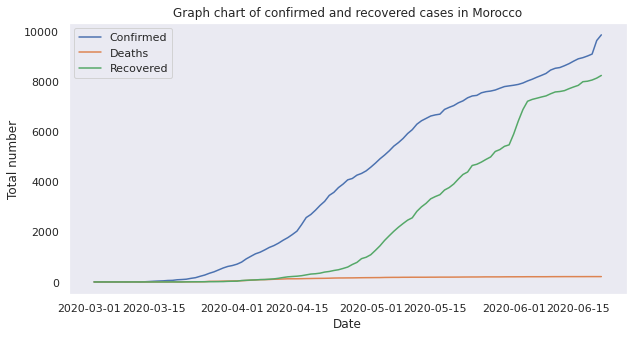

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df['Confirmed'], label = 'Confirmed')
sns.lineplot(data = df['Deaths'], label = 'Deaths')
sns.lineplot(data = df['Recovered'], label = 'Recovered')

plt.xlabel('Date')
plt.ylabel('Total number')
plt.title('Graph chart of confirmed and recovered cases in Morocco')

plt.legend()

<b>Repartition of new cases for rows 14 and 15 Avril on region are not available and that will affect our analysis</b>

In [62]:
df['2020-04-13':'2020-04-16']

,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima,Actif,Total Test
Date,,,,,,,,,,,,,,,,,,
2020-04-13,1763.0,126.0,203.0,7365.0,48.0,521.0,78.0,2.0,233.0,1.0,4.0,335.0,123.0,225.0,24.0,169.0,1434.0,9128.0
2020-04-14,1888.0,126.0,217.0,8034.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1545.0,9922.0
2020-04-15,2024.0,127.0,229.0,8626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1668.0,10650.0
2020-04-16,2283.0,130.0,249.0,10388.0,56.0,681.0,80.0,2.0,317.0,1.0,4.0,487.0,140.0,258.0,27.0,230.0,1904.0,12671.0


<b>the optimal solution for the missing datas in this example is to drop them out.</b>

In [63]:
df_original = df.copy() # later we will need all Confirmed,Death and Recovered collumns for all date uncluding 14,15 April

df = df[df.index != '2020-04-14']
df = df[df.index != '2020-04-15']

<b>Daily increases of total test</b>

Text(0, 0.5, 'Number of tests')

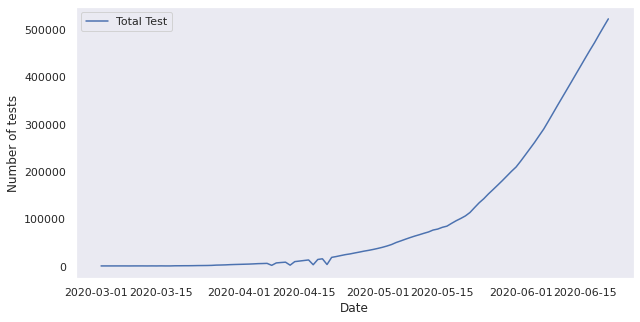

In [64]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df['Total Test'],label='Total Test')
plt.xlabel('Date')
plt.ylabel('Number of tests')

<b>Correlation between number of tests per day and the new confirmed cases</b>

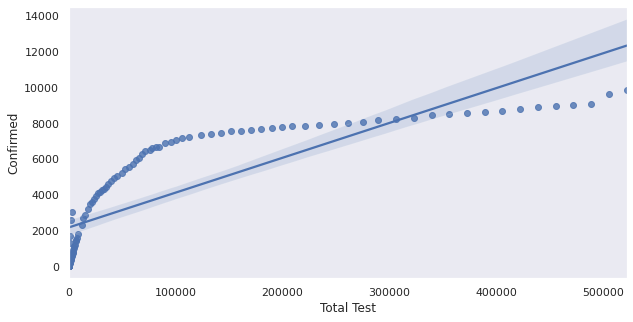

In [65]:
plt.figure(figsize=(10,5))
sns.regplot(x = df['Total Test'],y = df['Confirmed'])

<b>Graphing the evolution of total cases per regions</b>

In [66]:
df.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Excluded', 'Beni Mellal-Khenifra',
       'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab',
       'Fes-Meknes', 'Guelmim-Oued Noun', 'Laayoune-Sakia El Hamra',
       'Marrakesh-Safi', 'Oriental', 'Rabat-Sale-Kenitra', 'Souss-Massa',
       'Tanger-Tetouan-Al Hoceima', 'Actif', 'Total Test'],
      dtype='object')

Text(0.5, 1.0, 'Total cases evolution per region')

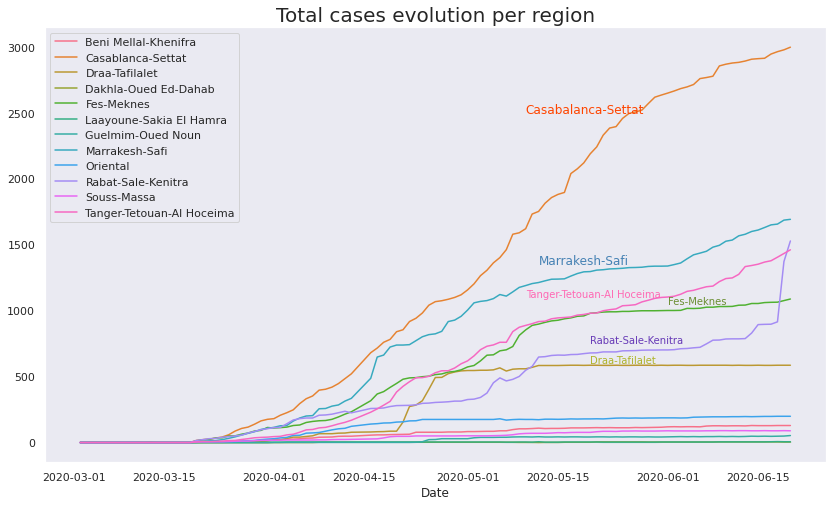

In [67]:
# Selecting regions
Regions1 = ['Beni Mellal-Khenifra',
       'Casablanca-Settat', 'Draa-Tafilalet', 'Dakhla-Oued Ed-Dahab',
       'Fes-Meknes', 'Laayoune-Sakia El Hamra','Guelmim-Oued Noun', 'Laayoune-Sakia El Hamra',
       'Marrakesh-Safi', 'Oriental', 'Rabat-Sale-Kenitra', 'Souss-Massa','Tanger-Tetouan-Al Hoceima']


plt.figure(figsize=(14,8))
sns.lineplot(data = df[Regions1],dashes=False)
plt.text('2020-05-10', 2500, 'Casabalanca-Settat', fontsize=12,color='#ff4500')
plt.text('2020-05-12', 1350, 'Marrakesh-Safi', fontsize=12,color='#4682B4')
plt.text('2020-05-10', 1100, 'Tanger-Tetouan-Al Hoceima', fontsize=10,color='#FF69B4')
plt.text('2020-06-01', 1050, 'Fes-Meknes', fontsize=10,color='#6b8e32')
plt.text('2020-05-20', 750, 'Rabat-Sale-Kenitra', fontsize=10,color='#673ab7')
plt.text('2020-05-20', 600, 'Draa-Tafilalet', fontsize=10,color='#afb42b')
plt.title('Total cases evolution per region',fontsize = 20)

Text(0.5, 1.0, 'Total case per region')

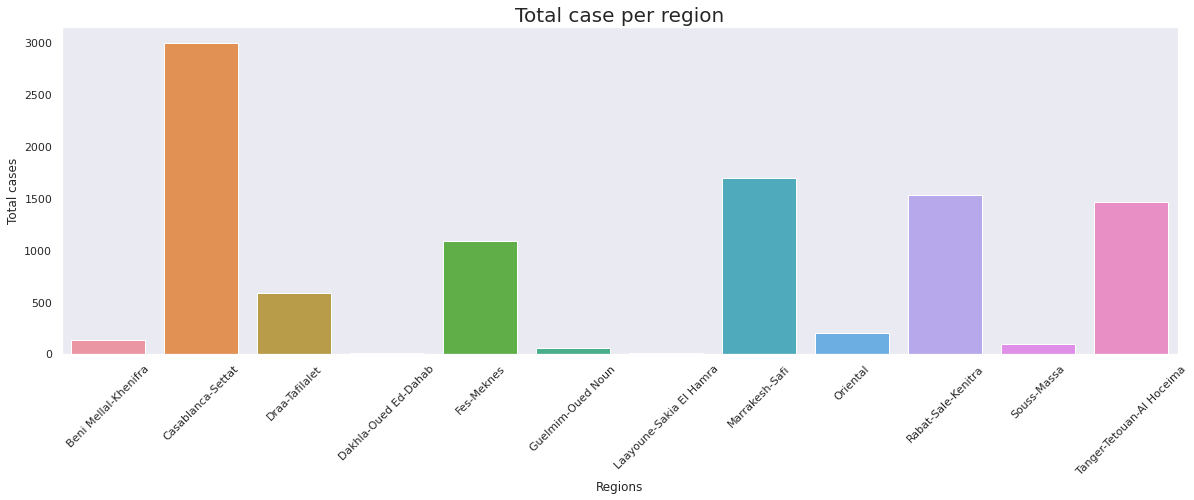

In [68]:
region_bar = df.iloc[[-1]].transpose()
region_bar = region_bar.drop(['Confirmed','Recovered','Deaths','Excluded','Actif','Total Test'])
region_bar.columns=['Total cases']
region_bar.index.name = 'Regions'
sns.set(style='dark')
plt.figure(figsize=(20,6))
sns.barplot(x=region_bar.index,y='Total cases',data=region_bar)
plt.xticks(rotation=45)
plt.title('Total case per region',fontsize=20)

<b>Graphing actif cases </b>
> > NB : the red vertical lines represents the lockdown periods

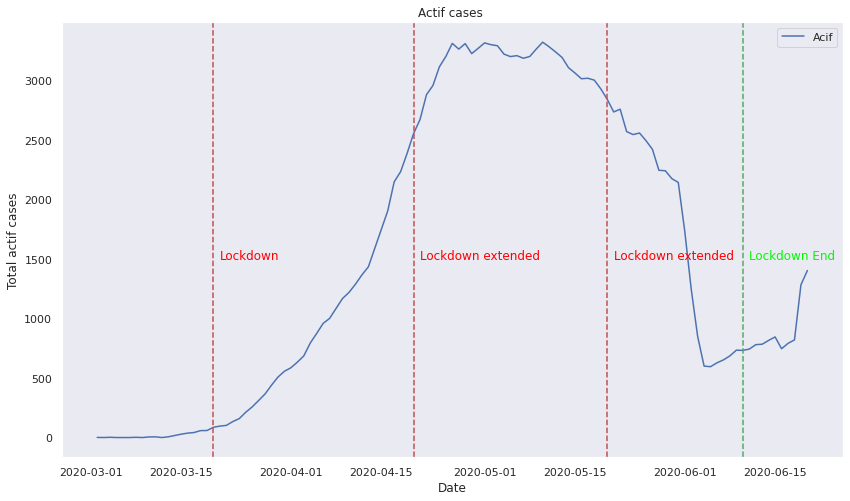

In [69]:
plt.figure(figsize=(14,8))
sns.lineplot(data = df['Actif'],label='Acif')
plt.axvline('2020-03-20',ls = '--',c = 'r')
plt.axvline('2020-04-20',ls = '--',c = 'r')
plt.axvline('2020-05-20',ls = '--',c = 'r')
plt.axvline('2020-06-10',ls = '--',c = 'g')
plt.text('2020-03-21', 1500, 'Lockdown', fontsize=12,color='#FF0000')
plt.text('2020-04-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-05-21', 1500, 'Lockdown extended', fontsize=12,color='#FF0000')
plt.text('2020-06-11', 1500, 'Lockdown End', fontsize=12,color='#00FA00')
plt.xlabel('Date')
plt.ylabel('Total actif cases')
plt.title('Actif cases ')
plt.legend()

<b>Pourcentage of Actif,death and recovered cases per day</b>

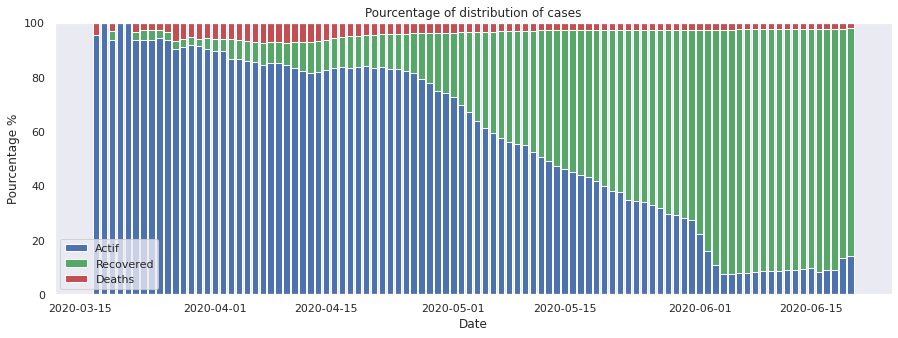

In [70]:
# getting the data that we want to plot
plt.figure(figsize=(15,5))
dataVar1 =(df_original['Actif']*100/df_original['Confirmed'])[15:]
dataVar3 =(df_original['Deaths']*100/df_original['Confirmed'])[15:]
dataVar2 =(df_original['Recovered']*100/df_original['Confirmed'])[15:]


# plot each data
p1 = plt.bar(dataVar1.index, 
             dataVar1,label='Actif')

p2 = plt.bar(dataVar2.index, 
             dataVar2,
             bottom=dataVar1,color='g',label='Recovered')

p3 = plt.bar(dataVar3.index,
             dataVar3,
             bottom=dataVar1+dataVar2,color='r',label='Deaths')

plt.xlabel('Date')
plt.ylabel('Pourcentage %')
plt.title('Pourcentage of distribution of cases')
plt.legend()

<b>Graphing total cases per regions</b>

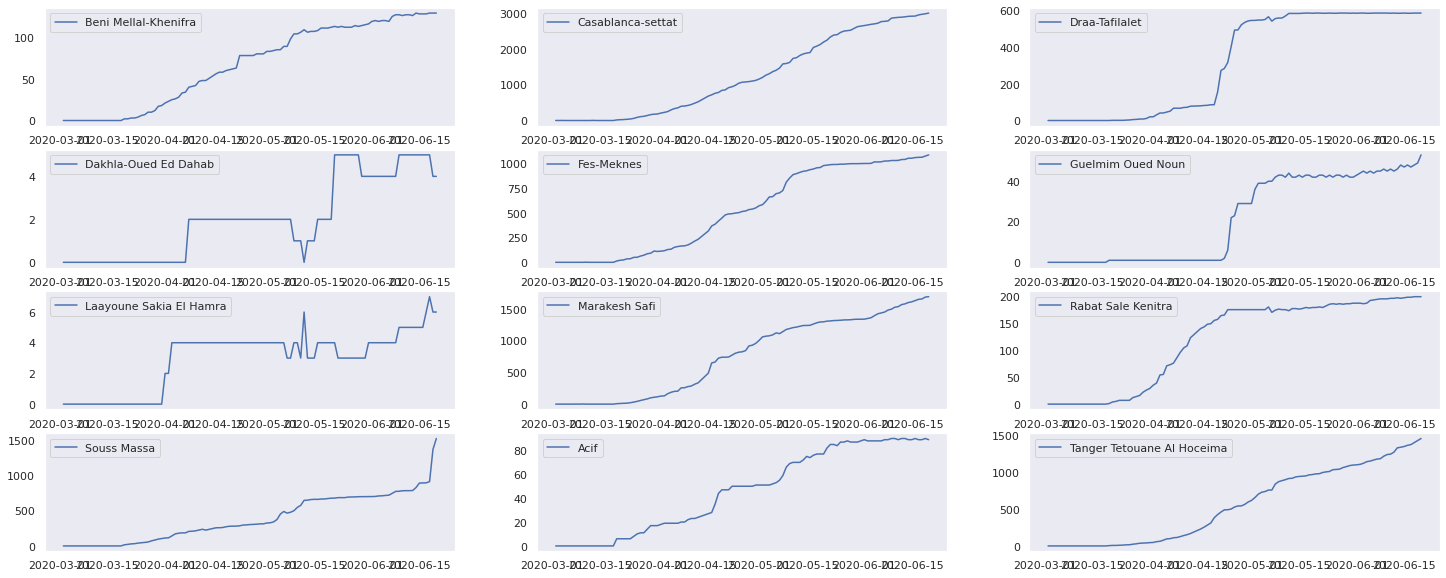

In [71]:

plt.figure(figsize=(25,10))

BM = df['Beni Mellal-Khenifra']
CS = df['Casablanca-Settat']
DT = df['Draa-Tafilalet']
DO = df['Dakhla-Oued Ed-Dahab']
FM = df['Fes-Meknes']
GO = df['Guelmim-Oued Noun']
LS = df['Laayoune-Sakia El Hamra']
MS = df['Marrakesh-Safi']
Or = df['Oriental']
RS = df['Rabat-Sale-Kenitra']
SM = df['Souss-Massa']
TT = df['Tanger-Tetouan-Al Hoceima']

ax1 = plt.subplot(4, 3, 1)
sns.lineplot(data = BM,label='Beni Mellal-Khenifra')
ax2 = plt.subplot(4, 3, 2)
sns.lineplot(data = CS,label='Casablanca-settat')
ax3 = plt.subplot(4, 3, 3)
sns.lineplot(data = DT,label='Draa-Tafilalet')
ax4 = plt.subplot(4, 3, 4)
sns.lineplot(data = DO,label='Dakhla-Oued Ed Dahab')
ax5 = plt.subplot(4, 3, 5)
sns.lineplot(data = FM,label='Fes-Meknes')
ax6 = plt.subplot(4, 3, 6)
sns.lineplot(data = GO,label='Guelmim Oued Noun')
ax7 = plt.subplot(4, 3, 7)
sns.lineplot(data = LS,label='Laayoune Sakia El Hamra')
ax8 = plt.subplot(4, 3, 8)
sns.lineplot(data = MS,label='Marakesh Safi')
ax9 = plt.subplot(4, 3, 9)
sns.lineplot(data = Or,label='Rabat Sale Kenitra')
ax10 = plt.subplot(4, 3, 10)
sns.lineplot(data = RS,label='Souss Massa')
ax11 = plt.subplot(4, 3, 11)
sns.lineplot(data = SM,label='Acif')
ax12 = plt.subplot(4, 3, 12)
sns.lineplot(data = TT,label='Tanger Tetouane Al Hoceima')


<b>Pie Chart of total cases per region</b>

Text(0.5, 1.0, 'Pie Chart of Total cases per region')

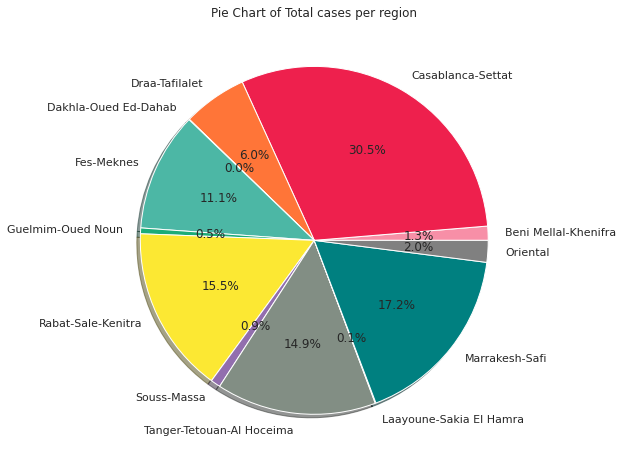

In [72]:
plt.figure(figsize=(16,8))
Slice = [df['Beni Mellal-Khenifra'][-1],df['Casablanca-Settat'][-1],df['Draa-Tafilalet'][-1],
        df['Dakhla-Oued Ed-Dahab'][-1],df['Fes-Meknes'][-1],df['Guelmim-Oued Noun'][-1],
        df['Rabat-Sale-Kenitra'][-1],df['Souss-Massa'][-1],df['Tanger-Tetouan-Al Hoceima'][-1],
        df['Laayoune-Sakia El Hamra'][-1],df['Marrakesh-Safi'][-1],df['Oriental'][-1]]
Labels = ['Beni Mellal-Khenifra','Casablanca-Settat','Draa-Tafilalet','Dakhla-Oued Ed-Dahab','Fes-Meknes',
         'Guelmim-Oued Noun','Rabat-Sale-Kenitra','Souss-Massa','Tanger-Tetouan-Al Hoceima','Laayoune-Sakia El Hamra',
         'Marrakesh-Safi','Oriental']
Colors = ['#f78fA7','#EE204D','#FF7538','#1F75FE','#4CB7A5','#1CAC78','#FCE833', '#926EAE', '#828E84' ,
          '#000000', '#008080','#808080']
Explode = [0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(Slice,colors = Colors,explode = Explode,shadow = True,autopct='%1.1f%%',
        labels = Labels,wedgeprops = {'edgecolor':'white'})


plt.title('Pie Chart of Total cases per region')


<b>Casablanca-Settat,Tanger-Tetouan Al Hoceima ,Marrakesh Safi have the greatest values of the total cases, because of the comercial,industrial, familial and semi familial epicenter, especially for the cities of Casablanca and Tangier that represent the  largest industrial zones in Morocco.</b>

<div id="two"><h1>2. Predecting data</h1></div>
<h4><a href="#content">reture to content table </a></h4>

<b>In this section I will  Forecast Total Number of Cases - Deaths and Confirmed Cases with Prohet</b>

<b>Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.</b>

I use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

<b>Installing and Importing prophet</b>

In [29]:
#pip install fbprophet

In [73]:
from fbprophet import Prophet

In [74]:
total_Deaths = df['Deaths']
total_Confirmed = df['Confirmed']
total_Recovered = df['Recovered']
mortaloty_rate = 100*total_Deaths/total_Confirmed

<b>Adding a new daily cases column to our data</b>

In [75]:
# this for loop adds the total confirmed cases for each day
new_cases = []
for i in range(len(total_Confirmed)):
    if i == 0:
        new_cases.append(0)
    elif total_Confirmed[i] < total_Confirmed[i-1]:
        new_cases.append(0)
    else:
        new_cases_tmp = int(total_Confirmed[i] - total_Confirmed[i-1])
        new_cases.append(new_cases_tmp)
# transform new_cases to an array  
new_cases = np.array(new_cases)
df['New cases'] = new_cases

<b>color the new cases according to the numbers </b>

In [76]:
df2 = pd.DataFrame(df['New cases'])
df2.style.background_gradient(cmap='Reds')

,New cases
Date,
2020-03-02 00:00:00,0
2020-03-03 00:00:00,0
2020-03-04 00:00:00,2
2020-03-05 00:00:00,0
2020-03-06 00:00:00,0
2020-03-07 00:00:00,0
2020-03-08 00:00:00,3
2020-03-09 00:00:00,0
2020-03-10 00:00:00,5


<b>Trend of Coronavirus Cases</b>

In [77]:
# Hands of plotly to visualise the current situation

import plotly.express as px
import plotly.graph_objects as go

# the 1st is a  bar plot of confirmed cases in morocco
fig = px.bar(df, x=df.index, y="New cases", color='New cases', orientation='v', height=600,
             title='Confirmed Cases in Morocco', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

# the 2nd is a figure of Trend of Coronavirus Cases in Morocco
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y = df['Confirmed'], mode= 'lines+markers',name='Total Cases'))
fig.add_trace(go.Scatter(x=df.index, y = df['Recovered'], mode='lines+markers',name='Recovered',line=dict(color='Green', width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.update_layout(title_text='Trend of Coronavirus Cases in Morocco (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# the 3rd is a figure of Trend of Actif Coronavirus Cases in Morocco
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y = df['Actif'], mode= 'lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Actif Coronavirus Cases in Morocco ',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

<div id="two1"><h2>2.1  Predecting the trend of confirmed cases in the next 10 Days</h2></div>
<h4><a href="#content">reture to content table </a></h4>

<b>The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast</b>

<b>grouping by Date (ds) and Confirmed (y)

In [78]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()

confirmed.columns = ['ds','y']

<b>Generating a 10 days ahead forecast of confirmed cases  using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.</b>

In [79]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=10)
future.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
109,2020-06-21
110,2020-06-22
111,2020-06-23
112,2020-06-24
113,2020-06-25
114,2020-06-26
115,2020-06-27
116,2020-06-28
117,2020-06-29
118,2020-06-30


<b>predicting the future with date, and upper and lower limit of y value</b>

In [80]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
114,2020-06-26,9763.435091,9571.240798,9980.485834
115,2020-06-27,9844.816618,9621.714089,10072.623934
116,2020-06-28,9892.472803,9630.829925,10142.506363
117,2020-06-29,9968.501583,9691.167834,10260.509351
118,2020-06-30,10044.924854,9728.760961,10365.086951


In [81]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast.ds, y = abs(forecast['yhat'].round()), mode= 'lines+markers',name='Predicted daily cases'))
fig.add_trace(go.Scatter(x=forecast.ds, y = abs(forecast['yhat_lower'].round()), mode= 'markers',name='Predicted daily cases yhat_lower'))
fig.add_trace(go.Scatter(x=forecast.ds, y = abs(forecast['yhat_upper'].round()), mode= 'markers',name='Predicted daily cases yhat_upper'))

fig.add_trace(go.Scatter(x=df.index, y = df['Confirmed'], mode= 'lines+markers',name='Daily cases'))

<b>The model predict more new cases in Morocco and it will get worse with the end of restrictions in some provinces</b>

<div id="two2"><h2>2.2  Predicting the new daily cases</h2></div>
<h4><a href="#content">reture to content table </a></h4>

<b>grouping by Date as (ds) and New cases as (y)</b>

In [82]:
new_cases = df.groupby('Date').sum()['New cases'].reset_index()
new_cases.columns = ['ds','y']

In [83]:
m_1 = Prophet(interval_width=0.95)
m_1.fit(new_cases)
future_1 = m_1.make_future_dataframe(periods=10)
future_1.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
114,2020-06-26
115,2020-06-27
116,2020-06-28
117,2020-06-29
118,2020-06-30


In [84]:
forecast_1 = m_1.predict(future_1)
forecast_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
114,2020-06-26,154.578282,6.007104,306.639994
115,2020-06-27,124.180086,-26.156295,261.158472
116,2020-06-28,126.448724,-21.209695,276.587519
117,2020-06-29,119.384996,-28.724925,271.669415
118,2020-06-30,109.509617,-37.422302,256.402517


In [85]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_1.ds, y = abs(forecast_1['yhat'].round()), mode= 'lines+markers',name='Predicted daily cases'))

fig.add_trace(go.Scatter(x=df.index, y = df['New cases'], mode= 'lines+markers',name='Daily cases'))

As shown the model predict not stable daily cases for the next 10 days.


<div id="two3"><h2>2.3  Predicting the total deaths</h2></div>
<h4><a href="#content">reture to content table </a></h4>

<b>grouping by Date as (ds) and Deaths as (y)</b>

In [86]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
deaths.columns = ['ds','y']

In [87]:
m_2 = Prophet(interval_width=0.95)
m_2.fit(deaths)
future_2 = m_2.make_future_dataframe(periods=10)
future_2.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
114,2020-06-26
115,2020-06-27
116,2020-06-28
117,2020-06-29
118,2020-06-30


In [88]:
forecast_2 = m_2.predict(future_2)
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
114,2020-06-26,218.347032,211.649841,226.500132
115,2020-06-27,218.542662,210.226354,229.218813
116,2020-06-28,219.411900,209.514103,232.162354
117,2020-06-29,220.379723,209.427380,235.586422
118,2020-06-30,220.720330,207.152019,237.406409


In [89]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_2.ds, y = abs(forecast_2['yhat'].round()), mode= 'lines+markers',name='Predicted total deaths'))

fig.add_trace(go.Scatter(x=df.index, y = df['Deaths'], mode= 'lines+markers',name='Daily cases'))

<div id="clc"><h1>3. Conclusion</h1></div>
<h4><a href="#content">reture to content table </a></h4>

<b>In this project we saw the power of machine learning and how it impact of our life, in such problems the machine learning can save many lives, but as many sciences that use probability and statistics it may be wrong or doesn't give the exact numbers but the most imortant that machine learning give us an accurate vue of the futur  </b>